# Customer Segmentation using Kmeans & PCA


- **Problem**

    Need to perform clustering to summarize customer segments.

- **Problem formulation**

    To create a Segmentation with customers who behave the same

    We want to investigate what are the common traits / behaviours in each Segment / Cluster

### Table of Contents

1. [Library Imports](#import-libraries)
2. [Data Retrieval](#get-the-data)
3. [Exploratory Data Analysis](#exploratory-dada-analysis-eda)
4. [Prepare the Data](#prepare-the-data)
5. [Model Training](#model-training)
6. [Insights and Recommendations](#next-steps)

## Import Libraries

In [2]:
# necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Get the Data

### Kaggle

In [3]:
%pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [4]:
!kaggle datasets list

ref                                                             title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                             Online Food Dataset                               3KB  2024-03-02 18:50:30          27109        528  0.9411765        
nbroad/gemma-rewrite-nbroad                                     gemma-rewrite-nbroad                              8MB  2024-03-03 04:52:39           1684        105  1.0              
startalks/pii-models                                            pii-models                                        1GB  2024-03-21 21:23:40            142         20  1.0              
sukhmandeepsinghbrar/most-subscribed-youtube-channel            Most Subscribed 

In [5]:
!kaggle datasets download -d imakash3011/customer-personality-analysis

customer-personality-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
import zipfile

with zipfile.ZipFile("customer-personality-analysis.zip", "r") as zip_ref:
    zip_ref.extractall()

### Read Dataset

In [7]:
customer_data = pd.read_csv('marketing_campaign.csv', sep= "\t")

In [8]:
customer_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
customer_data.shape

(2240, 29)

In [10]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [11]:
customer_data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [12]:
# checking for unique values in the whole dataset
for col in customer_data.columns:
    print(f'{col} : {customer_data[col].nunique()}')

ID : 2240
Year_Birth : 59
Education : 5
Marital_Status : 8
Income : 1974
Kidhome : 3
Teenhome : 3
Dt_Customer : 663
Recency : 100
MntWines : 776
MntFruits : 158
MntMeatProducts : 558
MntFishProducts : 182
MntSweetProducts : 177
MntGoldProds : 213
NumDealsPurchases : 15
NumWebPurchases : 15
NumCatalogPurchases : 14
NumStorePurchases : 14
NumWebVisitsMonth : 16
AcceptedCmp3 : 2
AcceptedCmp4 : 2
AcceptedCmp5 : 2
AcceptedCmp1 : 2
AcceptedCmp2 : 2
Complain : 2
Z_CostContact : 1
Z_Revenue : 1
Response : 2


## Exploratory Dada Analysis (EDA)<a name="eda"></a>

### Missing Values

In [13]:
customer_data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

#### Fill Missing Values

In [14]:
customer_data['Income'] = customer_data['Income'].fillna(customer_data['Income'].mean())

In [15]:
customer_data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [16]:
customer_data['Income'].median()

51741.5

In [17]:
customer_data['Income'].mean()

52247.25135379061

## Prepare the Data

### Encoding

In [18]:
# label encode the object columns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
customer_data['Education'] = le.fit_transform(customer_data['Education'])
customer_data['Marital_Status'] = le.fit_transform(customer_data['Marital_Status'])

## Model Training

### KMeans Model Traning

In [19]:
from sklearn.cluster import KMeans

In [20]:
kmeans = KMeans(n_clusters=6, random_state=42)

In [21]:
customer_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,4,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,4,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,5,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,5,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4,3,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [22]:
kmeans.fit(customer_data.drop(['Year_Birth', 'Dt_Customer'], axis=1))

KMeans(n_clusters=6, random_state=42)

In [23]:
# look at distribution of cluster labels

pd.Series(kmeans.labels_).value_counts()

2    542
4    528
0    512
5    347
1    310
3      1
Name: count, dtype: int64

### PCA Model Training

In [29]:
from sklearn.decomposition import PCA


# reduce the features to 2D
pca = PCA(n_components=3)
pca_result = pca.fit_transform(customer_data.drop(['Year_Birth', 'Dt_Customer'], axis=1))

In [30]:
pca_result.shape

(2240, 3)

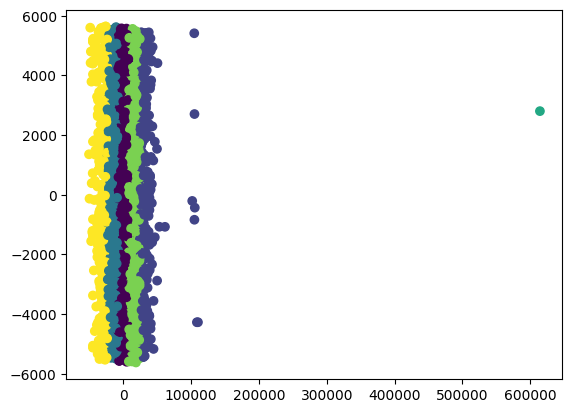

In [31]:
# plot the results

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans.labels_)

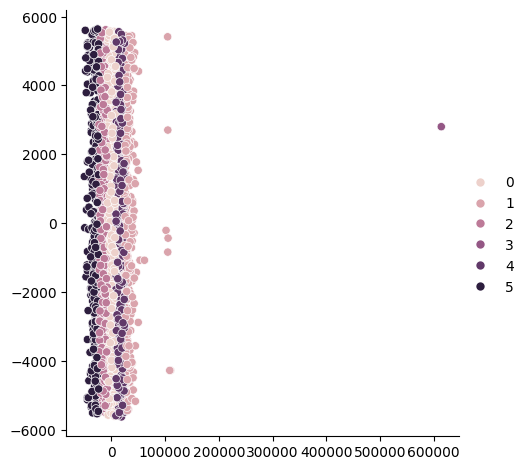

In [33]:
sns.relplot(
    x=pca_result[:, 0], y= pca_result[:, 1], hue=kmeans.labels_,
    data=customer_data)

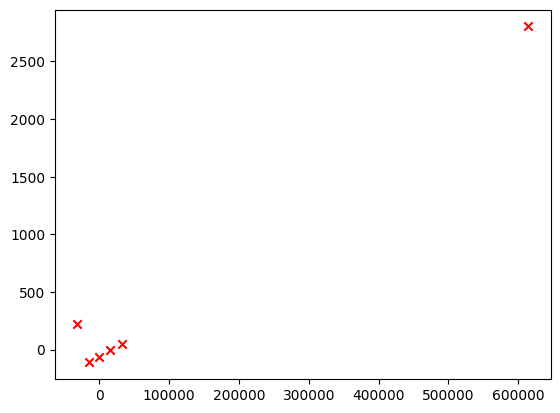

In [27]:
# reduce the cluster centers to 2D
pca_centers = pca.transform(kmeans.cluster_centers_)

# plot the centers
plt.scatter(pca_centers[:, 0], pca_centers[:, 1], c='red', marker='x')

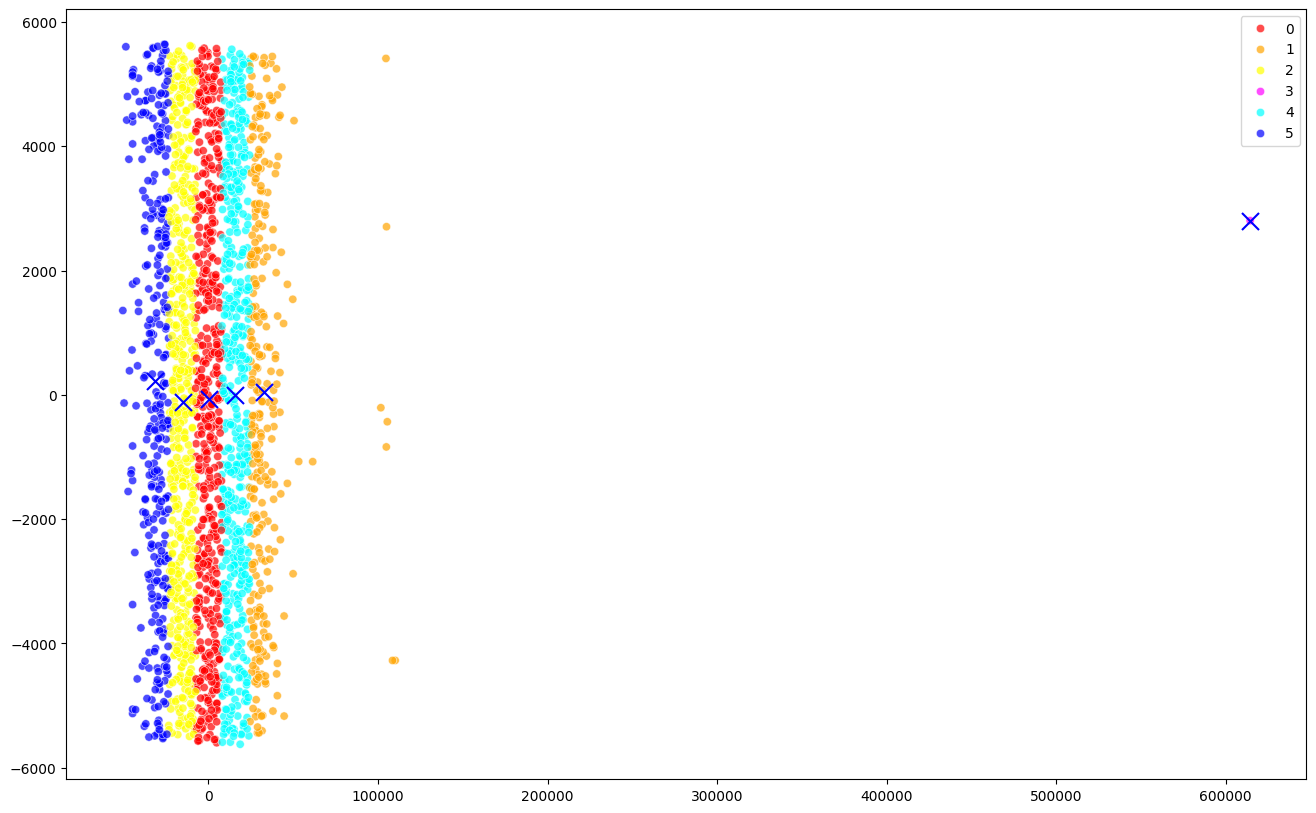

In [35]:
import seaborn as sns

kmeans_hue = kmeans.predict(customer_data.drop(['Year_Birth', 'Dt_Customer'], axis=1))

fig, ax = plt.subplots(figsize=(16,10))
ax = sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=kmeans_hue, alpha=0.7, legend='full',
                     palette = {0:'red',1:'orange',2:'yellow', 3:'magenta',4:'cyan', 5:'blue'}) #Grouping variable that will produce points with different colors
                                                                #choosing the colours when mapping to
plt.scatter(pca_centers[:, 0], pca_centers[:,1], marker='x', s=150, c='b')
ax.legend()


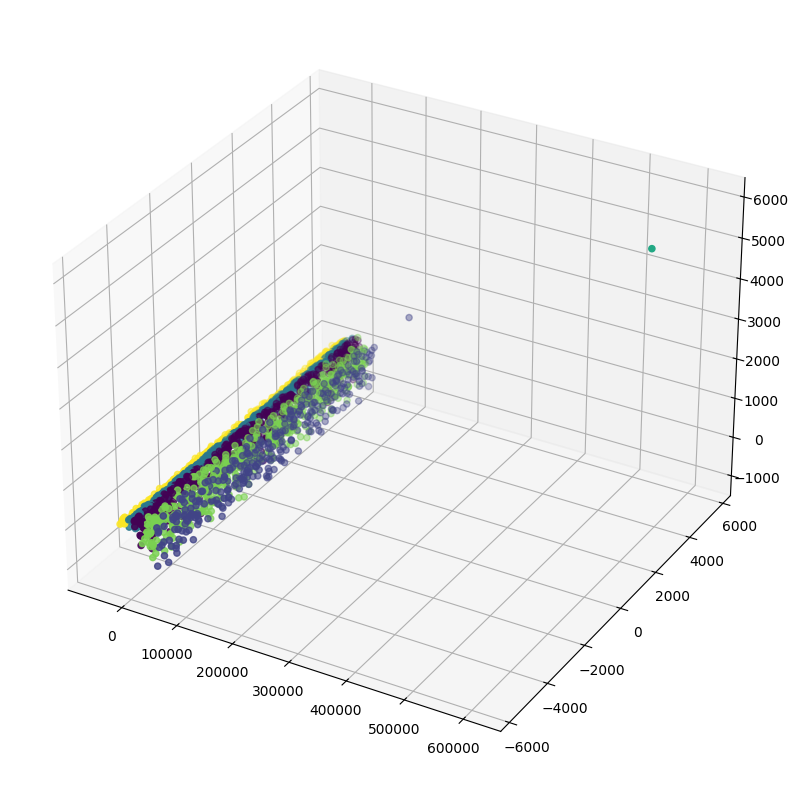

In [36]:
# clusters
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:,0], pca_result[:,1], pca_result[:,2], c=kmeans_hue, cmap='viridis')

Number of Components: 5
Total Variance Explained: 637602083.4297373
Variance Explained with 5 components: 637602083.4297373


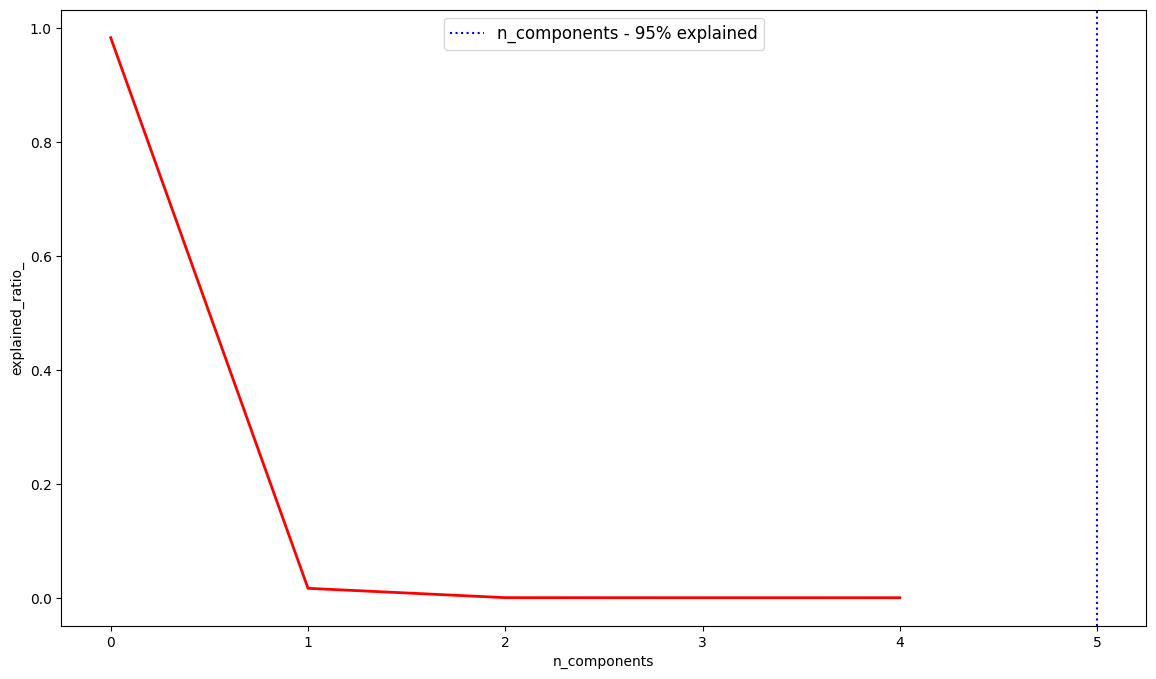

Number of Components: 10
Total Variance Explained: 637606201.6559552
Variance Explained with 10 components: 637606201.6559552


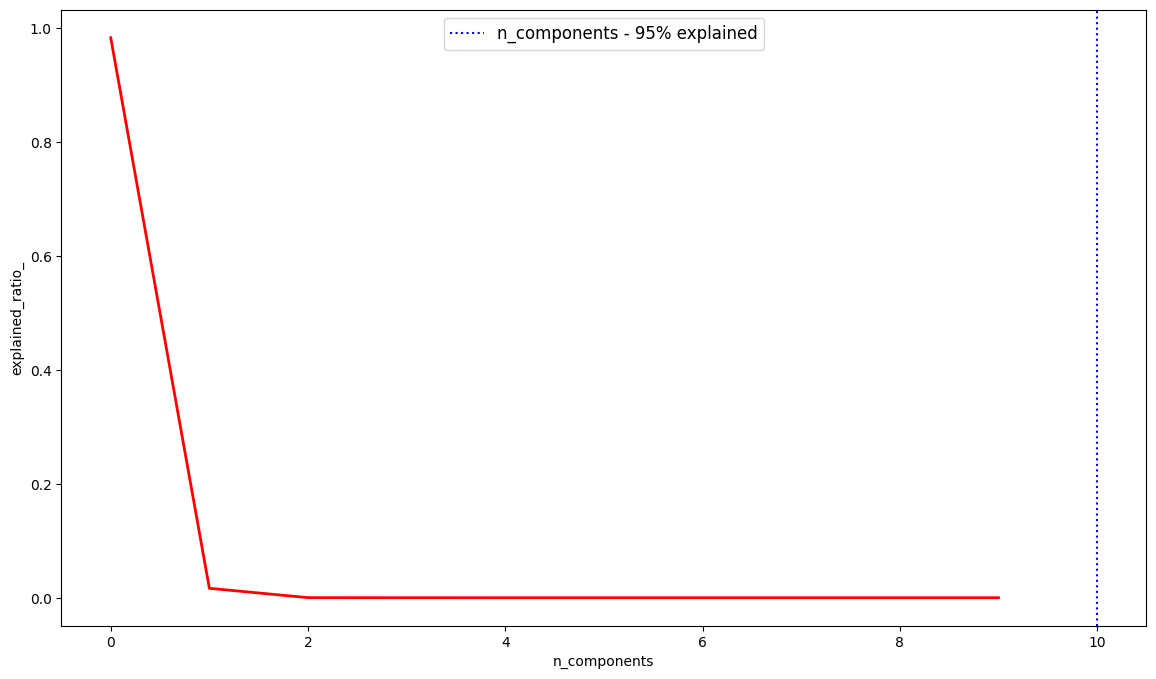

Number of Components: 15
Total Variance Explained: 637606216.3609589
Variance Explained with 15 components: 637606216.3609589


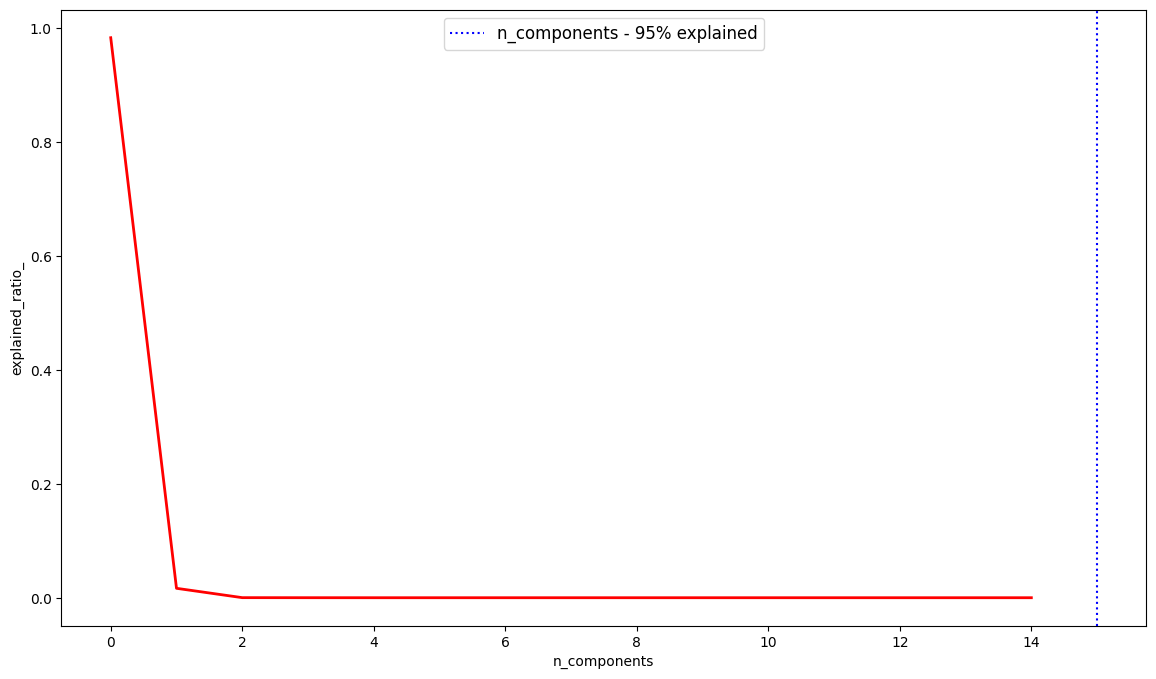

Number of Components: 20
Total Variance Explained: 637606218.0322332
Variance Explained with 20 components: 637606218.0322332


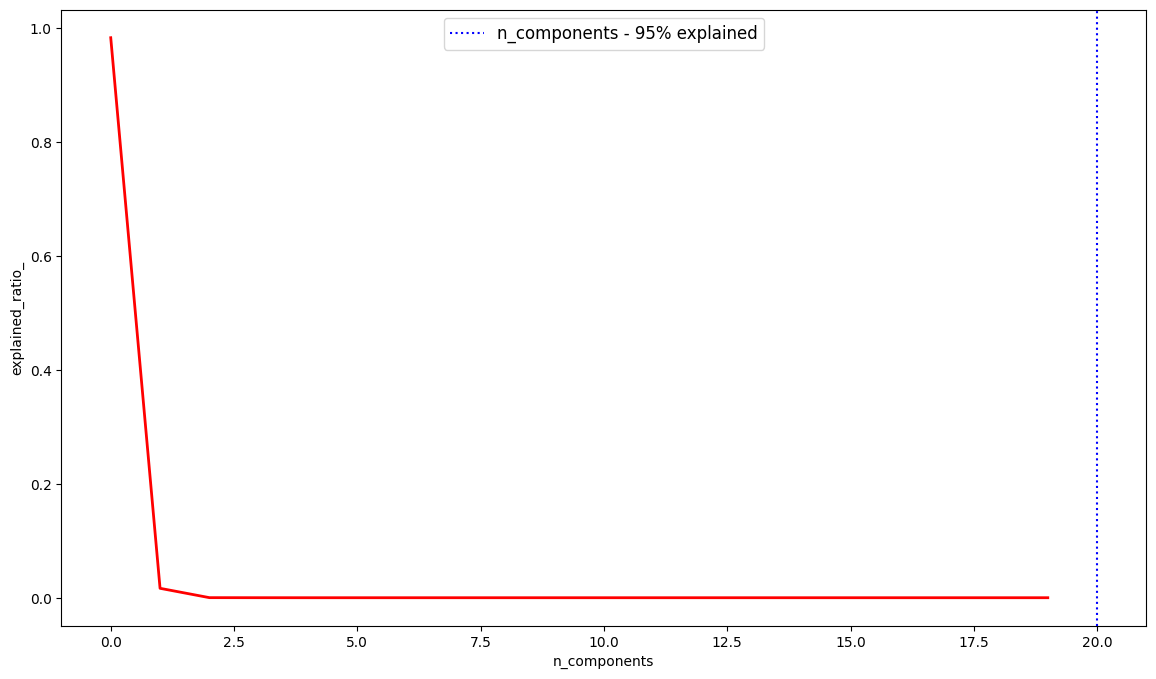

Number of Components: 25
Total Variance Explained: 637606218.1813152
Variance Explained with 25 components: 637606218.1813152


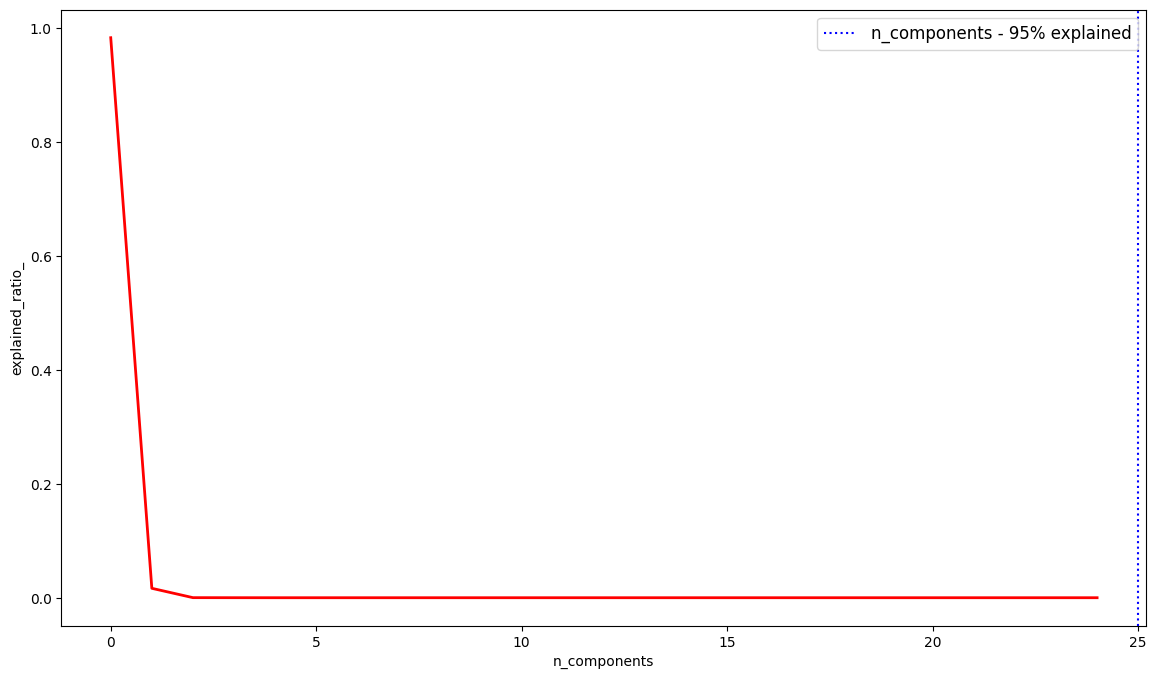

Number of Components: 27
Total Variance Explained: 637606218.1813152
Variance Explained with 27 components: 637606218.1813152


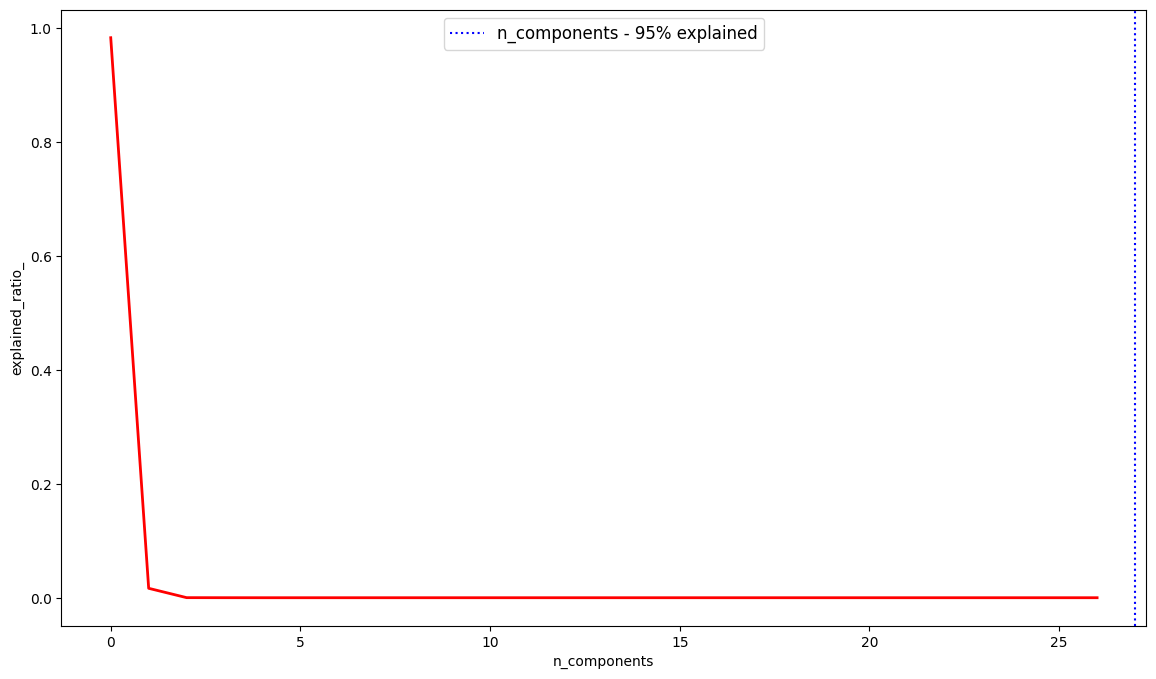

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
X = customer_data.drop(['Year_Birth', 'Dt_Customer'],axis=1)   #X_train
# Looping through different numbers of components
components_to_try = [5, 10, 15, 20, 25, 27]

# Initializing PCA with random state for reproducibility
pca = PCA(random_state=453)

for n_components in components_to_try:
    pca.n_components = n_components
    X_r = pca.fit_transform(X)

    # Calculating the 95% Variance
    total_variance = np.sum(pca.explained_variance_)
    var_95 = total_variance * 0.95

    print(f"Number of Components: {n_components}")
    print(f"Total Variance Explained: {total_variance}")
    print(f"Variance Explained with {n_components} components: {np.sum(pca.explained_variance_)}")

    # Plotting the Data
    plt.figure(figsize=(14, 8))
    plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
    plt.xlabel('n_components')
    plt.ylabel('explained_ratio_')

    # Plotting line with 95% e.v.
    plt.axvline(n_components, linestyle=':', label=f'n_components - 95% explained', c ="blue")
    plt.legend(prop=dict(size=12))

    # Adding annotation
    #plt.annotate(f'{n_components} eigenvectors used to explain 95% variance',
    #             xy=(n_components, pca.explained_variance_ratio_[n_components]),
    #             xytext=(n_components, pca.explained_variance_ratio_[n_components]),
    #             arrowprops=dict(facecolor='blue', shrink=0.05))

    plt.show()


In [42]:
# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Components", "Explained Variance"])

In [43]:
for i in range(0,n_components):
    # print(f"PCA Component {i}: {pca.components_[i]}")
    pca = PCA(n_components=n_components)
    values_train = pca.fit(X).transform(X)
    print(f"Explained Variance: {pca.explained_variance_[i]}")
    print(f"Variance Explained with {i} components: {np.sum(pca.explained_variance_)}")

Explained Variance: 626949293.8221606
Variance Explained with 0 components: 637606218.1813152
Explained Variance: 10539113.191146184
Variance Explained with 1 components: 637606218.1813152
Explained Variance: 82395.40590604853
Variance Explained with 2 components: 637606218.1813152
Explained Variance: 28179.549633804483
Variance Explained with 3 components: 637606218.1813152
Explained Variance: 3101.4608911290584
Variance Explained with 4 components: 637606218.1813152
Explained Variance: 1653.625255370299
Variance Explained with 5 components: 637606218.1813152
Explained Variance: 922.8091498770715
Variance Explained with 6 components: 637606218.1813152
Explained Variance: 836.7817395943493
Variance Explained with 7 components: 637606218.1813152
Explained Variance: 698.1925978507137
Variance Explained with 8 components: 637606218.1813152
Explained Variance: 6.81747548879519
Variance Explained with 9 components: 637606218.1813152
Explained Variance: 5.355965339803316
Variance Explained w

## Next Steps

1. **Segment Profiling:**
Analysis on each segment to understand their unique needs, preferrences and behaviors. This will create detailed customer profiles for each segment
2. **Product Customization:**
Tailor Products to meet specific needs of each defined segment.
3. **Cross-Selling Opportunities:**
Identify cross-selling opportunities within each segment by analyzing their purchasing behavior and identifying gaps in their insurance coverage
4. **Continuous Monitoring and Optimization:** 
Monitor performace of each new product within each segments and collect feedback from customers to identify areas for improvement.
5. **Personalized Marketing Strategies:**
Develop personalized marketing strategies for each segment to effectively communicate the value proposition of your products.